In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:

# Pandas data frame
df = pd.read_csv("../results/bootstrap/gfastats.bootstrap.txt", sep = "\t")

In [67]:
seq_index = [i for i, x in enumerate(list(df.columns)) if x.startswith("Seq")][0]
seq_index

30

In [68]:
start_index = [i for i, x in enumerate(list(df.columns)) if x.startswith("Run")][0]+1
start_index

2

In [69]:
color = ["royalblue", "green", "tomato","gold"]

In [70]:
df

,Size,Run,Node:1,Node:2,Node:3,Node:4,Node:5,Node:6,Node:7,Node:8,...,Seq:20,Seq:21,Seq:22,Seq:23,Seq:24,Seq:25,Seq:26,Seq:27,Seq:28,Unnamed: 58
0,2,0,3822809,7178880,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,3968045,7145705,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,3496752,7345319,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,3,4164667,7001738,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,4,4131579,7001157,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,27,16,3089346,1291699,749348.0,544944.0,425647.0,349532.0,307306.0,286549.0,...,2029191.0,2150499.0,2266432.0,2575124.0,3126242.0,4449143.0,6972579.0,77241480.0,NaN,NaN
517,27,17,3037812,1298801,744459.0,550444.0,427454.0,356683.0,304650.0,285656.0,...,1993002.0,2141056.0,2249106.0,2677930.0,3130734.0,4372228.0,6871977.0,77298655.0,NaN,NaN
518,27,18,2977459,1304479,749331.0,548444.0,420286.0,338399.0,310448.0,285284.0,...,1961730.0,2091232.0,2332182.0,2534798.0,3287930.0,4285890.0,6902673.0,77478656.0,NaN,NaN
519,27,19,3061543,1284159,751565.0,554608.0,421266.0,350419.0,315207.0,288326.0,...,1970258.0,2110042.0,2264996.0,2603416.0,3126293.0,4341130.0,6930438.0,77276915.0,NaN,NaN


In [71]:
seq_soft = df.apply(lambda x: sum([x for x in x.iloc[seq_index:].values if not np.isnan(x)][1:-1]), axis = 1)
seq_core = df.apply(lambda x: [x for x in x.iloc[seq_index:].values if not np.isnan(x)][-1], axis = 1)
seq_priv = df.apply(lambda x: [x for x in x.iloc[seq_index:].values if not np.isnan(x)][0], axis = 1)
seq_pan = df.apply(lambda x: sum([x for x in x.iloc[seq_index:].values if not np.isnan(x)][:]), axis = 1)


In [72]:
seq_core

0      100938994.0
1      100086754.0
2      101744386.0
3       99248490.0
4       99371656.0
          ...     
516     77241480.0
517     77298655.0
518     77478656.0
519     77276915.0
520     77123517.0
Length: 521, dtype: float64

In [73]:
seq_soft = seq_soft/1000000
seq_core = seq_core/1000000
seq_priv = seq_priv/1000000
seq_pan = seq_pan/1000000

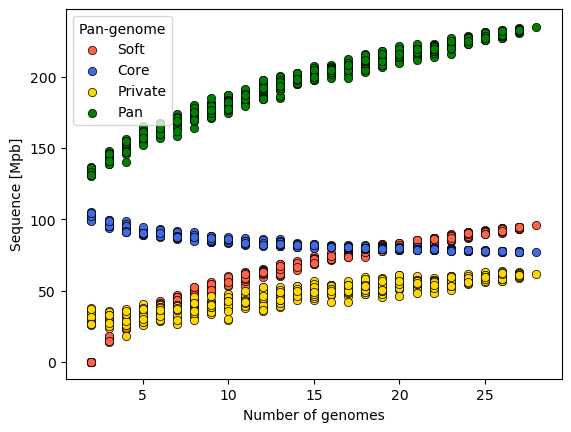

In [74]:
plt.scatter(df["Size"], seq_soft, color = color[2], edgecolor = "black", linewidth = 0.5, label = "Soft")
plt.scatter(df["Size"], seq_core, color = color[0], edgecolor = "black", linewidth = 0.5, label = "Core")

plt.scatter(df["Size"], seq_priv, color = color[3], edgecolor = "black", linewidth = 0.5, label = "Private")
plt.scatter(df["Size"], seq_pan, color = color[1], edgecolor = "black", linewidth = 0.5, label = "Pan")
legend = plt.legend()
legend.set_title("Pan-genome")
plt.xlabel("Number of genomes")
plt.ylabel("Sequence [Mpb]")
plt.savefig("plots/bootstrap/boots.acc.seq.png", dpi = 400)
plt.savefig("plots/bootstrap/boots.acc.seq.pdf")

In [75]:
node_soft = df.apply(lambda x: sum([x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][1:-1]), axis = 1)
node_core = df.apply(lambda x: [x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][-1], axis = 1)
node_priv = df.apply(lambda x: [x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][0], axis = 1)
node_pan = df.apply(lambda x: sum([x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][:]), axis = 1)

In [76]:
node_soft = node_soft/1000000
node_core = node_core/1000000
node_priv = node_priv/1000000
node_pan = node_pan/1000000

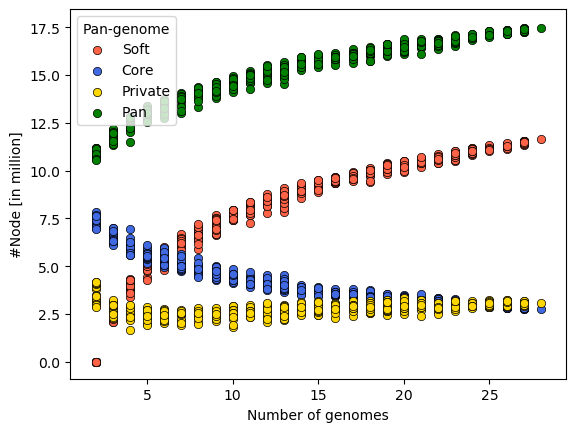

In [77]:
plt.scatter(df["Size"], node_soft, color = color[2], edgecolor = "black", linewidth = 0.5, label = "Soft")
plt.scatter(df["Size"], node_core, color = color[0], edgecolor = "black", linewidth = 0.5, label = "Core")

plt.scatter(df["Size"], node_priv, color = color[3], edgecolor = "black", linewidth = 0.5, label = "Private")
plt.scatter(df["Size"], node_pan, color = color[1], edgecolor = "black", linewidth = 0.5, label = "Pan")
legend = plt.legend()
legend.set_title("Pan-genome")
plt.xlabel("Number of genomes")
plt.ylabel("#Node [in million]")
plt.savefig("plots/bootstrap/boots.acc.node.png", dpi = 400)
plt.savefig("plots/bootstrap/boots.acc.node.pdf")

In [78]:
df

,Size,Run,Node:1,Node:2,Node:3,Node:4,Node:5,Node:6,Node:7,Node:8,...,Seq:20,Seq:21,Seq:22,Seq:23,Seq:24,Seq:25,Seq:26,Seq:27,Seq:28,Unnamed: 58
0,2,0,3822809,7178880,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,3968045,7145705,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,3496752,7345319,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,3,4164667,7001738,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,4,4131579,7001157,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,27,16,3089346,1291699,749348.0,544944.0,425647.0,349532.0,307306.0,286549.0,...,2029191.0,2150499.0,2266432.0,2575124.0,3126242.0,4449143.0,6972579.0,77241480.0,NaN,NaN
517,27,17,3037812,1298801,744459.0,550444.0,427454.0,356683.0,304650.0,285656.0,...,1993002.0,2141056.0,2249106.0,2677930.0,3130734.0,4372228.0,6871977.0,77298655.0,NaN,NaN
518,27,18,2977459,1304479,749331.0,548444.0,420286.0,338399.0,310448.0,285284.0,...,1961730.0,2091232.0,2332182.0,2534798.0,3287930.0,4285890.0,6902673.0,77478656.0,NaN,NaN
519,27,19,3061543,1284159,751565.0,554608.0,421266.0,350419.0,315207.0,288326.0,...,1970258.0,2110042.0,2264996.0,2603416.0,3126293.0,4341130.0,6930438.0,77276915.0,NaN,NaN


In [79]:
df.to_csv("data_created/bootstrap/bootstrap.txt", sep = "\t")